Appenddix
-click on the link:
>1. <a href=#Imports> Imports</a>
>2. <a href=#Load> Load Data</a>
>3. <a href=#Formating> Data Formating</a>
>4. <a href=#valid> Validate Assumption(option If exist)</a>
>5. <a href=#EDA1> Exploratory Date Analysis(Uni-varible)</a>
>6. <a href=#EDA2> Exploratory Date Analysis(mulivarible-relationships)</a>
>7. <a href=#ques> Questions& Insights</a>
>8. <a href=#modB> Baseline Model</a>
>9. <a href=#DP> Data prep & Experimentation</a>



## <a name=#Imports style=" font-size:150%;"> Libraries Imports </a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
import imblearn.over_sampling
#from sklearn.metrics import precision_recall_curve
from ipywidgets import interactive, FloatSlider
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,roc_curve,plot_roc_curve,roc_auc_score
from collections import Counter
from sklearn.datasets import make_classification,load_breast_cancer
#from sklearn.metrics import roc_auc_score, roc_curve,fbeta_score
import imblearn.over_sampling
import imblearn.under_sampling
#from sklearn.metrics import fbeta_score
import xgboost as xgb
from pylab import rcParams
from sklearn import ensemble, linear_model, neighbors, naive_bayes, model_selection,svm, datasets,metrics
#from sklearn import svm, datasets
#from sklearn import metrics
#from sklearn.datasets import load_breast_cancer



## <a name=#Imports style=" font-size:150%;"> Helper Functions:</a>

In [40]:
def make_confusion_matrix(model_logal,x_local,y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model_logal.predict_proba(x_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['retained', 'left'],
           yticklabels=['retained', 'left']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
    
def model_eval(model_logal,x_local,y_local,bta=1,eval_name="Train"):
    y_predict=model_logal.predict(x_local)
    print(f"---------{eval_name}Metrics-----------")
    print("Accuarcy Score;",model_logal.score(x_local,y_train))
    print("Precision Score:",precision_score(y_local,y_predict))
    print("Recall Score:",recall_score(y_local,y_predict))
    print(f"F{bta}Score:",fbeta_score(y_local,y_predict))

rcParams["figure.figsize"]=9,6

## <a name=#Load> Load Data </a>

In [41]:
df = pd.read_csv('HR_comma_sep.csv')

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [43]:
df.shape

(14999, 10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## <a name=#Formating> Feature Engineering</a> 

### Creat X,y

In [45]:
X=df.drop("left",axis=1).fillna(0)
y=df[("left")]

In [46]:
col_num=X.select_dtypes(include=np.number).columns

### Dummy variables and label encoder

In [47]:
X=pd.get_dummies(X,drop_first=True)

In [48]:
X.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
Department_RandD            uint8
Department_accounting       uint8
Department_hr               uint8
Department_management       uint8
Department_marketing        uint8
Department_product_mng      uint8
Department_sales            uint8
Department_support          uint8
Department_technical        uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

In [49]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


## <a name=#valid> Validate Assumption</a>

In [50]:
#to colcalate the nunique of each col
for col in df.columns.to_list():
    num_uniq= df[col].nunique()
    if num_uniq <=10:
        uniq_list=df[col].nunique()
    else:
         uniq_list="more than 10"
    print(col,":",num_uniq,",",uniq_list)
   

satisfaction_level : 92 , more than 10
last_evaluation : 65 , more than 10
number_project : 6 , 6
average_montly_hours : 215 , more than 10
time_spend_company : 8 , 8
Work_accident : 2 , 2
left : 2 , 2
promotion_last_5years : 2 , 2
Department : 10 , 10
salary : 3 , 3


In [51]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

## <a name=#EDA1> Exploratory Date Analysis(Uni-varible)</a>

In [52]:
left=df[df.left==1]
left.shape

(3571, 10)

In [53]:
retained=df[df.left==0]
df.shape

(14999, 10)

In [54]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0, 0.5, 'Frequency')

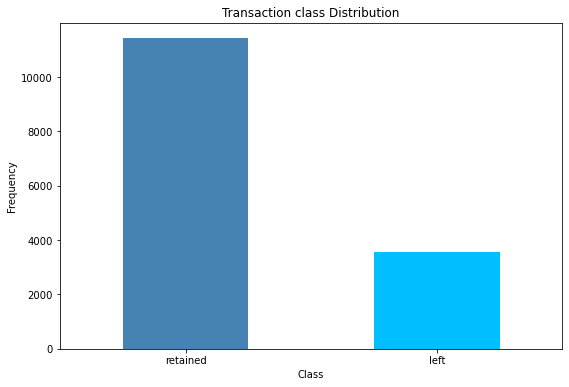

In [55]:
LABELS=["retained","left"]
count_classes=pd.value_counts(df["left"],sort=True)

count_classes.plot(kind="bar",rot=0,color=['steelblue','deepskyblue'])

plt.title("Transaction class Distribution")

plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

## <a name=#EDA2> Exploratory Date Analysis(mulivarible-relationships)</a>

<AxesSubplot:title={'center':'Correlation between department and employee retention'}, xlabel='Department'>

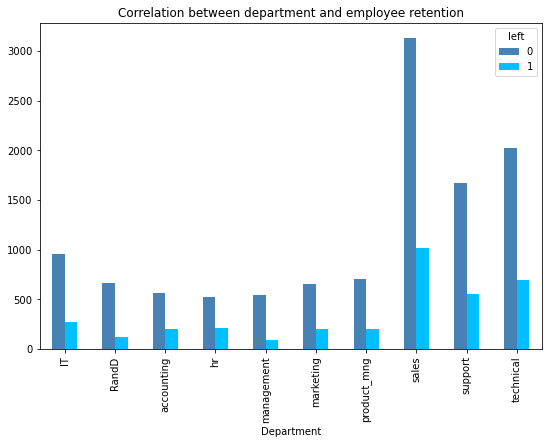

In [56]:
pd.crosstab(df.Department,df.left).plot(kind='bar',color=['steelblue','deepskyblue'],title="Correlation between department and employee retention")

<AxesSubplot:title={'center':'Impact of Employees Salaries on Retention'}, xlabel='salary'>

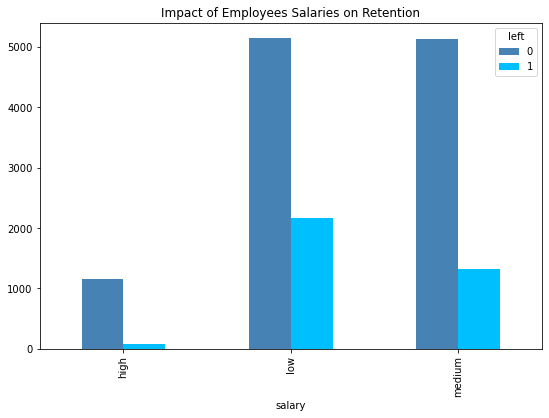

In [57]:
pd.crosstab(df.salary,df.left).plot(kind='bar',color=['steelblue','deepskyblue'],title='Impact of Employees Salaries on Retention')

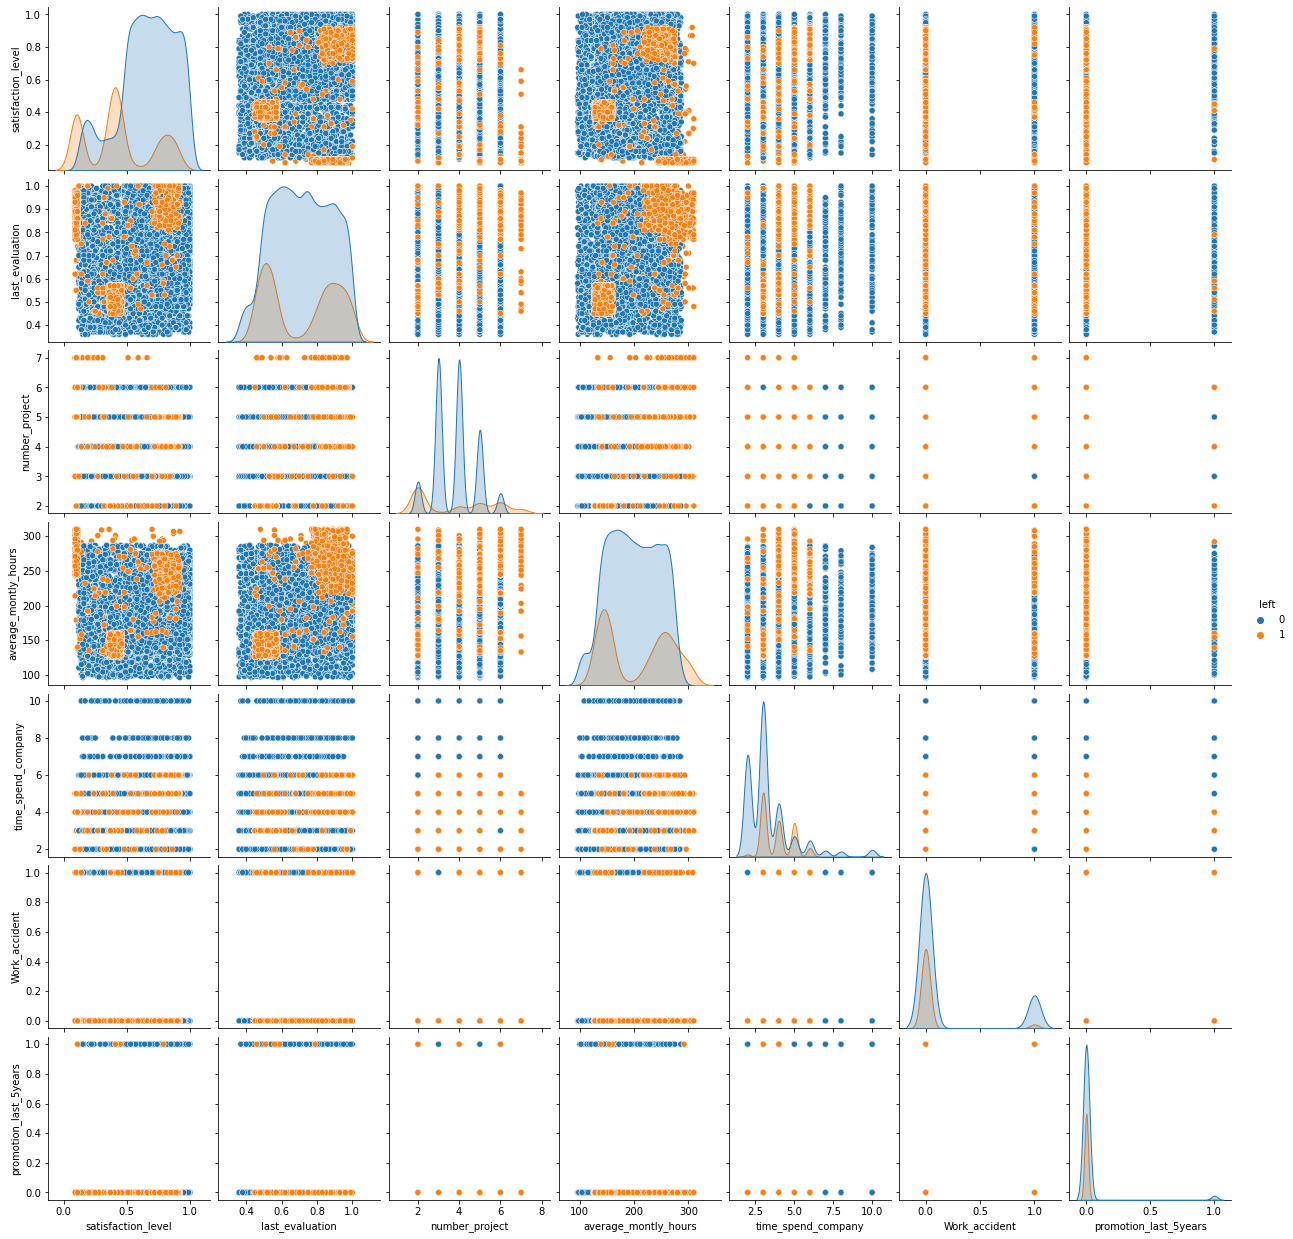

In [43]:
sns.pairplot(df, hue="left")

## <a name=#ques> Questions& Insights</a>

## <a name=#modB> Baseline Model</a>

## Logistic Regression

### split the data

In [58]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=42)

### Baseline Model with numerical(Expr0)

In [59]:
lr=LogisticRegression(max_iter=500)

In [60]:
lr.fit(X_train[col_num],y_train)
print(lr.score(X_train[col_num],y_train))
print(lr.score(X_test[col_num],y_test))

0.7673074786087343
0.7543333333333333


### chooose your metric f1/acc>>> f1

In [61]:
fbeta_score(y_test, lr.predict_proba(X_test[col_num])[:,1] > 0.05, beta = 1)

0.41537544696066747

## <a name=#DP> Data prep & Experimentation</a>

### Expr1: with all the data(dummy included)

In [62]:
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.79019891099011
0.7806666666666666


### Expr2: with scaling(standard scaler or minmax scaler) 

In [63]:
# define MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



scaler.fit(X_train.values)

MinMaxScaler()

In [64]:
X_tr = scaler.transform(X_train.values)
X_ts = scaler.transform(X_test.values)

In [65]:
lr.fit(X_tr,y_train)
print(lr.score(X_tr,y_train))
print(lr.score(X_ts,y_test))

0.7908656517390821
0.7853333333333333


### Expr3: using grid search LogisticRegression

In [66]:
lr2=LogisticRegression(max_iter=500)

In [67]:
prams={"penalty":[ 'l2'],
      "C":[0.5,0.7,0.8,1.0]}
#c: np.arang(0.1,3,0.2)

In [68]:
gd_cv=GridSearchCV(lr2,param_grid=prams,n_jobs=-1, error_score = 'raise')
gd_cv.fit(X_tr,y_train)

GridSearchCV(error_score='raise', estimator=LogisticRegression(max_iter=500),
             n_jobs=-1,
             param_grid={'C': [0.5, 0.7, 0.8, 1.0], 'penalty': ['l2']})

In [69]:
gd_cv.best_score_

0.7904221481069731

In [70]:
gd_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [71]:
best_model=gd_cv.best_estimator_

In [72]:
print(best_model.score(X_tr,y_train))
print(best_model.score(X_ts,y_test)) 

0.7908656517390821
0.7853333333333333


### Expr4 Decision trees

In [73]:
decisiontree = DecisionTreeClassifier()

In [74]:
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
decisiontree.score(X_train, y_train)

1.0

In [76]:
decisiontree.score(X_test,y_test)

0.973

### Expe5: using GridsearchCV to Decision trees

In [77]:
prams1={"max_depth":[3,5,7,8,11,12],
      "min_samples_split":[2,3,5,9],"criterion":["gini","entropy"]}

In [78]:
gd_cv1=GridSearchCV(decisiontree,param_grid=prams1,n_jobs=-1)
gd_cv1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'min_samples_split': [2, 3, 5, 9]})

In [79]:
gd_cv1.best_score_

0.9798864801432895

In [80]:
gd_cv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}

In [81]:
best_model1=gd_cv1.best_estimator_

In [82]:
print(best_model1.score(X_train,y_train))
print(best_model1.score(X_test,y_test)) 

0.9845538393154795
0.9733333333333334


### Expe6:Random forest

In [83]:
randomforest = RandomForestClassifier(n_estimators=100)

In [84]:
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
randomforest.score(X_train, y_train)

1.0

In [86]:
randomforest.score(X_test, y_test)

0.9836666666666667

### Expe7:using GridsearchCV to Random forest

In [87]:
prams2={"max_depth":[3,5,7,8,11,12],
      "min_samples_split":[2,3,5,9],"criterion":["gini","entropy"],
        "n_estimators":[10,20,40,50,70],"max_features":["auto","sqrt","log2"]}


In [88]:
gd_cv2=GridSearchCV(randomforest,param_grid=prams2,n_jobs=-1)
gd_cv2.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 9],
                         'n_estimators': [10, 20, 40, 50, 70]})

In [89]:
gd_cv2.best_score_

0.9831091347044655

In [90]:
gd_cv2.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [91]:
best_model2=gd_cv2.best_estimator_

In [92]:
print(best_model2.score(X_train,y_train))
print(best_model2.score(X_test,y_test)) 

0.9913323702633626
0.9793333333333333


### Expe8:using knn models

In [94]:
knn_model = neighbors.KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_model.score(X_train, y_train)

0.9549949994443827

In [95]:
knn_model.score(X_test,y_test)

0.9333333333333333

### Expe8:using GridsearchCV to KNN

In [96]:
prams3={"n_neighbors":[3,10,20,30]}

gd_cv3=GridSearchCV(knn_model,param_grid=prams3,n_jobs=-1)
gd_cv3.fit(X_tr,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 10, 20, 30]})

In [97]:
gd_cv3.best_score_

0.9374370329195232

In [98]:
gd_cv3.best_params_

{'n_neighbors': 3}

In [99]:
best_model3=gd_cv3.best_estimator_

In [100]:
print(best_model3.score(X_tr,y_train))
print(best_model3.score(X_ts,y_test)) 

0.9714412712523613
0.943


### Train each model 

In [101]:
model_names = ["best_model", "best_model3", "randomforest"]

models = ["lr", "knn_model", "randomforest",]




print(f'{lr} score: {best_model.score(X_ts, y_test)}')
print(f'{knn_model} score: {best_model3.score(X_ts, y_test)}')
print(f'{randomforest} score: {randomforest.score(X_test, y_test)}')

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))






LogisticRegression(max_iter=500) score: 0.7853333333333333
KNeighborsClassifier() score: 0.943
RandomForestClassifier() score: 0.9836666666666667


In [102]:
model_list

[('best_model', LogisticRegression(max_iter=500)),
 ('best_model3', KNeighborsClassifier(n_neighbors=3)),
 ('randomforest', RandomForestClassifier())]

### Expe9: using Voting

### Max Voting

In [103]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('best_model', LogisticRegression(max_iter=500)),
                             ('best_model3',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('randomforest', RandomForestClassifier())],
                 n_jobs=-1)

In [104]:
voting_classifer.score(X_train, y_train)

0.9886654072674742

In [105]:
voting_classifer.score(X_test, y_test)

0.9653333333333334

In [106]:
# get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
#accuracy_score(y_test, y_pred)
fbeta_score(y_test, y_pred, beta = 1)

0.9245283018867924

### Average Voting 10

In [107]:
# create voting classifier
voting_classiferA = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classiferA.fit(X_train, y_train)

VotingClassifier(estimators=[('best_model', LogisticRegression(max_iter=500)),
                             ('best_model3',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('randomforest', RandomForestClassifier())],
                 n_jobs=-1, voting='soft')

In [108]:
voting_classiferA.score(X_train, y_train)

0.9931103455939548

In [109]:
voting_classiferA.score(X_test, y_test)

0.9686666666666667

In [110]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_predA= voting_classiferA.predict(X_test)
#accuracy_score(y_test, y_pred)

fbeta_score(y_test, y_predA, beta = 1)

0.9320809248554914

### Expe11: Stacking Classifier

In [111]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [112]:
stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(max_iter=500),
                                KNeighborsClassifier(n_neighbors=3),
                                RandomForestClassifier()],
                   meta_classifier=LogisticRegression())

In [113]:
stacked.score(X_train, y_train)

0.999888876541838

In [114]:
stacked.score(X_test, y_test)

0.9826666666666667

### precision , recall  and fbeta stacked

In [115]:
y_pred = stacked.predict(X_test)
#accuracy_score(y_test, y_pred)

In [116]:
stacked.predict_proba(X_test)[:,1]

array([0.00102324, 0.00102324, 0.00102324, ..., 0.00102324, 0.00102324,
       0.9482225 ])

In [117]:
recall_score(y_test, y_pred)

0.9405099150141643

In [118]:
precision_score(y_test, y_pred)

0.9851632047477745

In [119]:
fbeta_score(y_test, stacked.predict_proba(X_test)[:,1] > 0.05, beta = 1)

0.9623188405797101

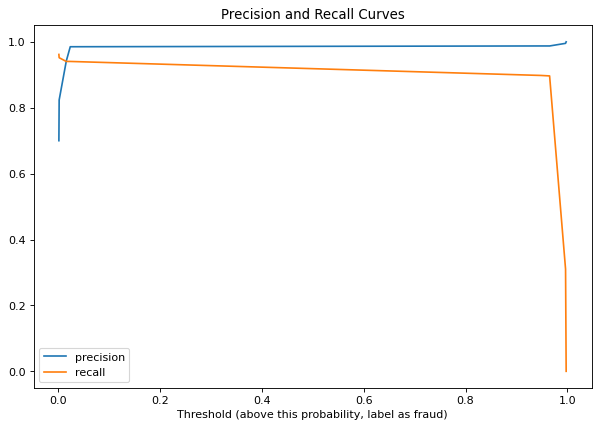

In [120]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 



precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, stacked.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [121]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(stacked,X_train, y_train,threshold), threshold=(0.0,1.0,0.02))



interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### precision , recall  and fbeta  for lr 

In [122]:
y_predictlr = best_model.predict(X_ts)

In [123]:
accuracy_score(y_test, y_predictlr)

0.7853333333333333

In [124]:
recall_score(y_test, y_predictlr)

0.3314447592067989

In [125]:
precision_score(y_test, y_predictlr)

0.5763546798029556

In [126]:
fbeta_score(y_test, best_model.predict_proba(X_ts)[:,1] > 0.05, beta = 1)

0.43101837433821244

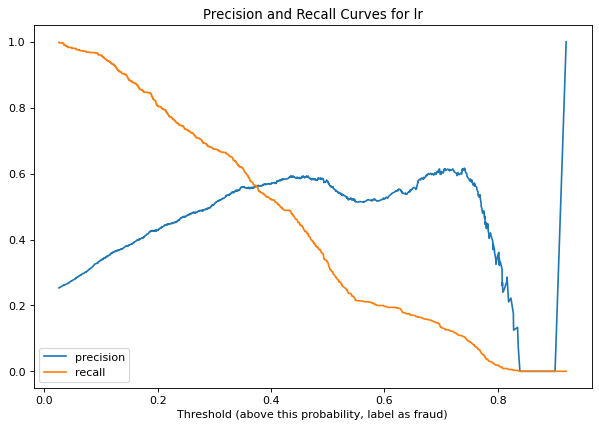

In [127]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model.predict_proba(X_ts)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves for lr');

In [128]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(best_model,X_tr, y_train,threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### precision , recall and fbeta for  knn

In [129]:
y_predictknn = best_model3.predict(X_ts)

In [130]:
accuracy_score(y_test, y_predictknn)

0.943

In [131]:
recall_score(y_test, y_predictknn)

0.9065155807365439

In [132]:
precision_score(y_test, y_predictknn)

0.8590604026845637

In [133]:
fbeta_score(y_test, best_model3.predict_proba(X_ts)[:,1] > 0.05, beta = 1)

0.8474148802017655

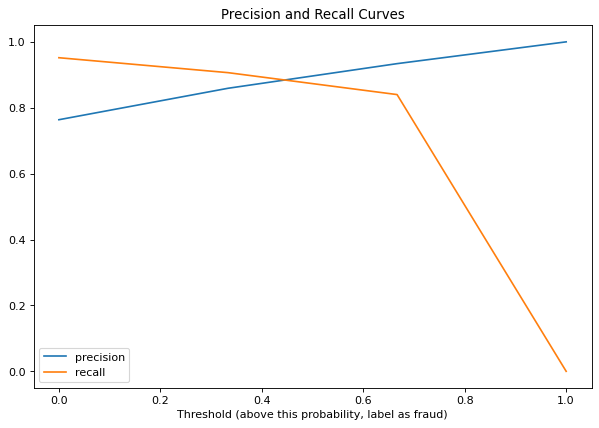

In [134]:

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model3.predict_proba(X_ts)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [135]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(best_model3,X_tr, y_train,threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### precision , recall and fbeta for  randomforest

In [136]:
y_predict_randomforest = randomforest.predict(X_test)

In [137]:
accuracy_score(y_test, y_predict_randomforest)

0.9836666666666667

In [138]:
recall_score(y_test, y_predict_randomforest)

0.9419263456090652

In [139]:
precision_score(y_test, y_predict_randomforest)

0.9881129271916791

In [140]:
fbeta_score(y_test, randomforest.predict_proba(X_test)[:,1] > 0.05, beta = 1)

0.8055716773070227

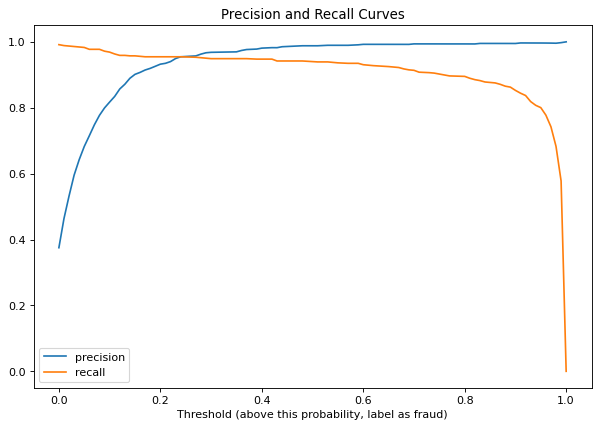

In [141]:

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, randomforest.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [142]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(randomforest,X_train, y_train,threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### solve the Imbalance Before model training(oversampling)

In [143]:


# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg} 

# randomly oversample positive samples: create 5x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_tr, y_train)

lrr = LogisticRegression(solver='liblinear') 
lrr.fit(X_tr, y_train)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lrr.predict(X_ts)), roc_auc_score(y_test, lrr.predict_proba(X_ts)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_os.predict(X_ts)), roc_auc_score(y_test, lr_os.predict_proba(X_ts)[:,1])))

Simple Logistic Regression; Test F1: 0.422, Test AUC: 0.813
Logistic Regression on Oversampled Train Data; Test F1: 0.594, Test AUC: 0.820


<AxesSubplot:>

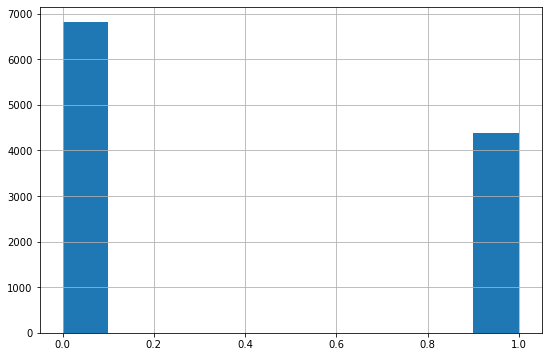

In [144]:
y_tr_rs.hist()

### solve the Imbalance Before model training(undersampling)

In [145]:


# setup for the ratio argument of RandomunderSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)


# randomly Undersample positive samples
RUS = RandomUnderSampler(random_state=43) 
    

X_ru, y_ru = RUS.fit_resample(X_tr, y_train)

lrr = LogisticRegression(solver='liblinear') 
lrr.fit(X_tr, y_train)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lrr.predict(X_ts)), roc_auc_score(y_test, lrr.predict_proba(X_ts)[:,1]))) 


lr_u = LogisticRegression(solver='liblinear') 
lr_u.fit(X_ru, y_ru)

print('Logistic Regression on Underampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_u.predict(X_ts)), roc_auc_score(y_test, lr_u.predict_proba(X_ts)[:,1])))




Simple Logistic Regression; Test F1: 0.422, Test AUC: 0.813
Logistic Regression on Underampled Train Data; Test F1: 0.603, Test AUC: 0.821


<AxesSubplot:>

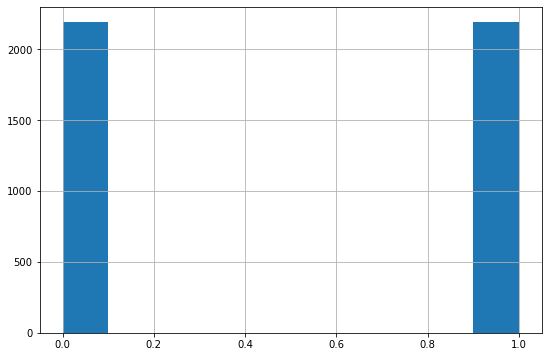

In [146]:
y_ru.hist()

### GridSearch(CV LogisticRegression) undersampling inbelance

In [147]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

lr_gd = LogisticRegression(solver='liblinear')

RUS = RandomUnderSampler( random_state = 42)

pipeline = Pipeline([('rus', RUS), ('log', lr_gd)])

parms = {"log__penalty":[ 'l2']}
gcv= GridSearchCV(pipeline, parms, cv = 3, verbose=10 )
gcv.fit(X_tr, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START log__penalty=l2.............................................
[CV 1/3; 1/1] END ...........................log__penalty=l2; total time=   0.0s
[CV 2/3; 1/1] START log__penalty=l2.............................................
[CV 2/3; 1/1] END ...........................log__penalty=l2; total time=   0.0s
[CV 3/3; 1/1] START log__penalty=l2.............................................
[CV 3/3; 1/1] END ...........................log__penalty=l2; total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=42)),
                                       ('log',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'log__penalty': ['l2']}, verbose=10)

In [148]:
b_s_b=gcv.best_estimator_

In [149]:
f1_score(y_test, b_s_b.predict(X_ts))

0.6167209554831705

### XGBClassifier

In [150]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_ru,y_ru),(X_ts,y_test)]
fit_model = gbm.fit( 
                    X_ru, y_ru, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_ts, ntree_limit=gbm.best_ntree_limit)) 
f1_score(y_test, fit_model.predict(X_ts))

0.9315263908701854

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

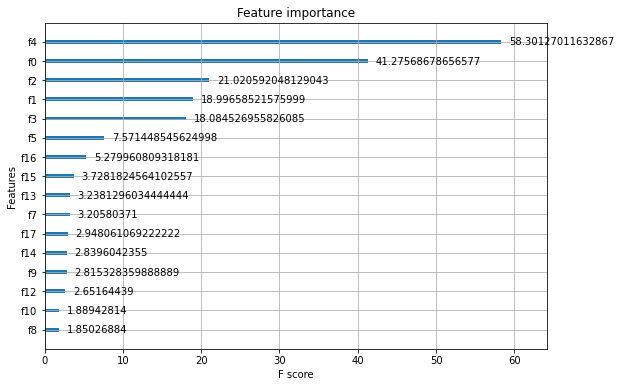

In [150]:
xgb.plot_importance(gbm, importance_type='gain')

### XGBClassifier  (RandomizedSearchCV)

In [152]:
params_comb=70

prams={"min_child_weight":[1,5,10],
      "gamma":[0.5,1,1.5,2,5],"subsample":[0.6,0.8,1.0],"colsample_bytree":[0.6,0.8,1.0],
      "max_depth":[3,4,5]}



In [153]:
modelMO = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [154]:
from sklearn.model_selection import RandomizedSearchCV

param_comb = 70

random_search = RandomizedSearchCV(modelMO, param_distributions=prams, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_tr, y_train) 

Fitting 10 folds for each of 70 candidates, totalling 700 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [155]:
best_model_R=random_search.best_estimator_

In [155]:
print('Best score:')
print(random_search.best_score_)

Best score:
0.9584673307992515


In [159]:
f1_score(y_test, best_model_R.predict(X_ts))

0.9466764061358657

### randomforest (undersampling inbelance)

In [159]:

# setup for the ratio argument of RandomunderSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)


# randomly Undersample positive samples
RUS = RandomUnderSampler(random_state=43) 

X_ruR, y_ruR = RUS.fit_resample(X_train, y_train)

randomforestS = RandomForestClassifier(n_estimators=100) 
randomforestS.fit(X_train, y_train)

print('Simple randomforest; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, randomforestS.predict(X_test)), roc_auc_score(y_test, randomforestS.predict_proba(X_test)[:,1]))) 

randomforestU = RandomForestClassifier(n_estimators=100) 
randomforestU.fit(X_train, y_train)

 
randomforestU.fit(X_ruR, y_ruR)

print('Logistic Regression on Underampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, randomforestU.predict(X_test)), roc_auc_score(y_test, randomforestU.predict_proba(X_test)[:,1])))

Simple randomforest; Test F1: 0.964, Test AUC: 0.988
Logistic Regression on Underampled Train Data; Test F1: 0.957, Test AUC: 0.988


### ROC

Text(0.5, 1.0, 'ROC curve')

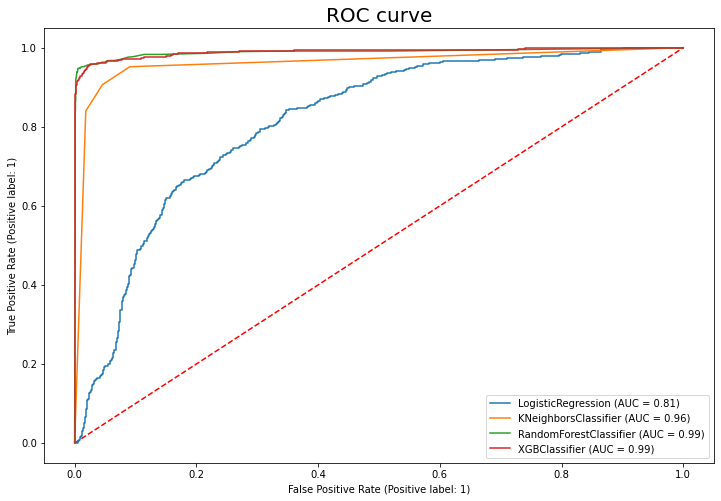

In [165]:
plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], "r--")
ax = plt.gca()

plot_roc_curve(best_model, X_ts, y_test, ax=ax)
plt.title("ROC curve", size=20)
plot_roc_curve(best_model3, X_ts, y_test, ax=ax)
plt.title("ROC curve", size=20)
plot_roc_curve(randomforest, X_test, y_test, ax=ax)
plt.title("ROC curve", size=20)
plot_roc_curve(best_model_R, X_ts, y_test, ax=ax)
plt.title("ROC curve", size=20)
